In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

random.seed(1212)

In [3]:
seq_df = pd.read_csv("data/merge_data/ALL/Kmer_k3__DACC_lag2__SC-PseDNC-General_all_index.csv")
rbp_df = pd.read_csv("data/merge_data/ALL/transcript2rbp_pvalue__cutoff10-3.csv")

In [ ]:
seq_col = list(seq_df.columns[2:])
rbp_col = list(rbp_df.columns[2:])
new_df = pd.DataFrame([])
for i in range(len(seq_col)):
    for j in range(len(rbp_col)):
        print("%s*%s" %(seq_col[i], rbp_col[j]))
        new_df["%s*%s" %(seq_col[i], rbp_col[j])] = seq_df[seq_col[i]] * rbp_df[rbp_col[j]]

In [24]:
rbp_df.head()

,Transcript_stable_ID,loc,M001_0.6,M002_0.6,M004_0.6,M013_0.6,M016_0.6,M019_0.6,M020_0.6,M021_0.6,...,M332_0.6,M345_0.6,M346_0.6,M347_0.6,M348_0.6,M349_0.6,M350_0.6,M351_0.6,M352_0.6,M353_0.6
0,ENST00000594950,N,0.0,0.000000,0.0,0.0,3.572586,4.425198,4.494438,0.0,...,0.000000,0.000000,0.0,3.297391,3.023335,0.000000,0.0,3.217977,4.092570,3.098119
1,ENST00000537288,N,0.0,3.208831,0.0,0.0,3.017087,0.000000,3.302749,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2,ENST00000400385,N,0.0,0.000000,0.0,0.0,3.067926,3.800521,3.673379,0.0,...,0.000000,3.132823,0.0,3.168728,0.000000,3.060663,0.0,3.730172,3.480794,0.000000
3,ENST00000448247,N,0.0,0.000000,0.0,0.0,3.458680,3.821809,3.487111,0.0,...,0.000000,0.000000,0.0,3.338959,0.000000,0.000000,0.0,3.644214,3.490992,0.000000
4,ENST00000629058,N,0.0,3.187024,0.0,0.0,0.000000,4.072646,0.000000,0.0,...,3.088758,3.842606,0.0,0.000000,3.420706,3.144338,0.0,3.447459,4.736600,0.000000


In [23]:
new_df['Transcript_stable_ID'] = seq_df['Transcript_stable_ID']
new_df['loc'] = seq_df['loc']

In [25]:
new_df.to_csv("data/merge_data/ALL/transcript2pse_in_one*rbp_pvalue__cutoff10-3.csv", index=False)

In [9]:
data_df = pd.read_csv("data/merge_data/ALL/transcript2pse_in_one*rbp_pvalue__cutoff10-3.csv")
loc = np.where(data_df['loc'].to_numpy() == 'N', 1, 0)
data = data_df[data_df.columns.drop(["loc", "Transcript_stable_ID"])].to_numpy()

In [18]:
data = data_df[data_df.columns.drop(["loc", "Transcript_stable_ID"])].to_numpy()

In [9]:
data = seq_df[seq_df.columns[2:]].to_numpy()

In [10]:
# transcript2pse_in_one*rbp_pvalue_cutoff10-3_-log10
train_idx = np.load("data/merge_data/seq_rbp/pse_in_one2__rbp_10-3_-log10__train_idx.npy")
test_idx = np.load("data/merge_data/seq_rbp/pse_in_one2__rbp_10-3_-log10__test_idx.npy")
np.save("data/merge_data/seq_rbp/transcript2pse_in_one__train__x.npy", data[train_idx])
# np.save("data/merge_data/seq_rbp/pse_in_one2__rbp_10-3_-log10__train__y.npy", loc[train_idx])
np.save("data/merge_data/seq_rbp/transcript2pse_in_one__test__x.npy", data[test_idx])
# np.save("data/merge_data/seq_rbp/pse_in_one2__rbp_10-3_-log10__test__y.npy", loc[test_idx])

In [7]:
idx = np.arange(len(loc))
random.shuffle(idx)
split_idx = int(len(idx) * 0.8//1)
train_idx = idx[:split_idx]
test_idx = idx[split_idx:]
np.save("data/merge_data/seq_rbp/pse_in_one2__rbp_10-3_-log10__train_idx.npy", train_idx)
np.save("data/merge_data/seq_rbp/pse_in_one2__rbp_10-3_-log10__test_idx.npy", test_idx)
np.save("data/merge_data/seq_rbp/pse_in_one2__rbp_10-3_-log10__train__x.npy", data[train_idx])
np.save("data/merge_data/seq_rbp/pse_in_one2__rbp_10-3_-log10__train__y.npy", loc[train_idx])
np.save("data/merge_data/seq_rbp/pse_in_one2__rbp_10-3_-log10__test__x.npy", data[test_idx])
np.save("data/merge_data/seq_rbp/pse_in_one2__rbp_10-3_-log10__test__y.npy", loc[test_idx])

In [ ]:
for i in range(3, 7):
    train_x = np.load("data/RBP-PWM/train/train_-log10__10-%s__x.npy" % i)
    plt.boxplot(np.sum(train_x != 0, axis=1))
    plt.title("10-%s num %s, %s" % (i, sum(np.sum(train_x != 0, axis=1) != 0), sum(np.sum(train_x != 0, axis=0) >= 10)))
    plt.show()
    plt.boxplot(np.sum(train_x != 0, axis=0))
    plt.title("10-%s num %s, %s" % (i, sum(np.sum(train_x != 0, axis=1) != 0), sum(np.sum(train_x != 0, axis=0) >= 10)))
    plt.show()
    # test_x = np.load("data/RBP-PWM/test/test__10-%s__x.npy" % i)
    # np.save("data/RBP-PWM/train/train_-log10__10-%s__x.npy" % i, np.where(train_x == 0, 0, -np.log10(train_x)))
    # np.save("data/RBP-PWM/test/test_-log10__10-%s__x.npy" % i, np.where(test_x == 0, 0, -np.log10(test_x)))

In [59]:
for i in range(3, 7):
    train_x = np.load("data/RBP-PWM/train/train__10-%s__x.npy" % i)
    train_x = np.where(train_x != 0, 1, 0)
    np.save("data/RBP-PWM/train/train_binary__10-%s__x.npy" % i, train_x)

In [61]:
train_y = np.load("data/RBP-PWM/train/train_y.npy")
for i in range(3, 5):
    train_x = np.load("data/RBP-PWM/train/train_-log10__10-%s__x.npy" % i)
    
    
    row_filter = np.sum(train_x != 0, axis=1) != 0
    col_filter = np.sum(train_x != 0, axis=0) >= 10
    print(train_y[row_filter].shape)
    print(train_x[row_filter][:, col_filter].shape)
    np.save("data/RBP-PWM/train/train_-log10__10-%s__filter__y.npy" % i, train_y[row_filter])
    np.save("data/RBP-PWM/train/train_-log10__10-%s__filter__x.npy" % i, train_x[row_filter][:, col_filter])
    np.save("data/RBP-PWM/train/train_-log10__10-%s__row_filter!=0.npy" % i, row_filter)
    np.save("data/RBP-PWM/train/train_-log10__10-%s__col_filter>=10.npy" % i, col_filter)
    
    train_x = np.load("data/RBP-PWM/train/train_binary__10-%s__x.npy" % i)
    row_filter = np.sum(train_x != 0, axis=1) != 0
    col_filter = np.sum(train_x != 0, axis=0) >= 10
    print(train_y[row_filter].shape)
    print(train_x[row_filter][:, col_filter].shape)
    np.save("data/RBP-PWM/train/train_binary__10-%s__filter__y.npy" % i, train_y[row_filter])
    np.save("data/RBP-PWM/train/train_binary__10-%s__filter__x.npy" % i, train_x[row_filter][:, col_filter])
    np.save("data/RBP-PWM/train/train_binary__10-%s__row_filter!=0.npy" % i, row_filter)
    np.save("data/RBP-PWM/train/train_binary__10-%s__col_filter>=10.npy" % i, col_filter)
    # print(i, sum(row_filter), sum(col_filter))
    # break
    

(2254,)
(2254, 75)
(2254,)
(2254, 75)
(1929,)
(1929, 54)
(1929,)
(1929, 54)


In [4]:
with open("data/Chiu/benchmark_cyto.out") as f:
    txt = f.read().split(">")[1:]
    arrays = []
    for i in range(len(txt)):
        # txt[i] = txt[i].split("\n")
        arrays.append([txt[i].split("\n")[0], txt[i].split("\n")[1]])
        # cdhit80_0320_hasloc[i][0] = cdhit80_0320_hasloc[i][0].split("|")[1]
print(arrays[0])


['AC002467.1|ENST00000440971|lncRNA|known|651|chr7:107742962-107744581[-]|0.215704|ENCODE,Cyto', 'ATTCTCGCCCGTCCACTCCCAGCGTAAAGAGGATTCCGCGACTCGGAGACCGCAATCTACCCGCCAGTCTCCATAACGTAGGCCAGAGCAGCTGGGCTAAATAAAACAGAGCCGGGGCTCTCCCTTCCCGAAGGCCTACATCGCCCACTGGTCCGGGCTCGGAGCTCAGCAGAACCAGAGTAGGAGCGGTTGTTGCCGGCACGGAGGAGGGAGAGCGCTTGTGACGCTACGAACCTCTCGAACACCTGACGACTGGGCGCCAGGGCCGGATGGAGGGTGGAGAGCCAGTGCGGCGCAGCTGCCTCCTCTTAACGGGGACACCTTGCAGGAATGTGCGGAGTGGAGCTAACGGGAGCGGATAGAAACCGAGGGAGGGGAAGAGAGCGCGAAGGCTTGGCCGGAAGGAGAGGTTAAAAAGGAAAGGCCTAAAATGAGGAAGAGAGTTACCACAACAAGCAGTACCTAGTTCCAGTTCTTGGTCCCAGGAGTTTGTGGTTGTTGCTGCTTTCATCTTCCTCAGCCAACACAAAAGGAAAGTGCCAAGGGGCGATTCCTAGGACCTTCAGTGCAGTCTCCACCTTGCGGACTTGGCTCATTTGTGTCCACTCCTTTCTCCAGCCTTTTACACTTGATGCTCTTGGATGAATAGAA']


In [15]:
seq_df = pd.read_csv("data/linear_features/cdhit80_data_seq_loc75.csv")

total: 3040
min: 50, max: 37027
<7500: 3010
<500: 250


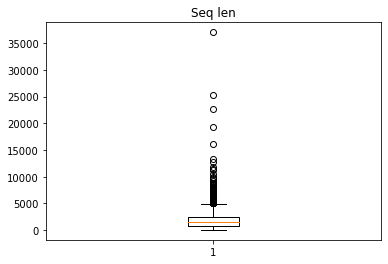

In [19]:
import matplotlib.pyplot as plt

l = [len(s) for s in seq_df['Sequence']]
print("total:", len(l))
print("min: %d, max: %d" % (min(l), max(l)))
print("<7500:", sum(np.array(l) < 7500))
print("<500:", sum(np.array(l) < 500))


plt.boxplot(l)
plt.title("Seq len")
plt.show()

In [6]:
data_y = np.where(seq_df["loc"].to_numpy() == "Cytosolic", 1, 0)
np.save("data/data_y_train.npy", data_y)

In [6]:
seq_df.head(10)

,Unnamed: 0,Refseq_ID,Gene_ID,Sequence,loc
0,10,NR_109833.1,NCBI:101867536,AAATCTCAGCCTCCCACTCCCATATTTACAGTTTGATTAGGGAGGC...,Cytosolic
1,11,NR_026832.1,NCBI:150622,AGTCTGGCTGGAGCTGGACCGGCTGGTGGCGCCAGGCAGTGCCAAG...,Cytosolic
2,32,NR_170711.1,NCBI:388524,AGAGTTTGGGATCGGTCTCTTCTGTTCCGCGTCCTCCACCTCGGTA...,Cytosolic
3,57,NR_110646.1,NCBI:101060146,TATTCAGGACTAGCGCAGGACTCTGGGCGACCTCACATCCCACTCG...,Cytosolic
4,58,XR_001755930.1,NCBI:100506901,GTCATAACGGCGACCGTGAAGACTTTTAAAATAGAGACCAACGTGG...,Cytosolic
5,64,NR_110917.1,NCBI:101927580,AGAAGAGTGCAGTATGTTTGATGGTCCTGCTTGAGCCATTTGCTCC...,Cytosolic
6,65,NR_152435.1,NCBI:221262,AGTGTAAGAGTTGCTGTAGCAACCTCACAGCTGTGCTCTGTCTAGC...,Cytosolic
7,72,NR_003525.2,NCBI:387646,TCAGGCTGGAATGCAATGTTGCGATCTCGCTTCACTGCAGCCTCTG...,Cytosolic
8,78,XR_001755922.1,NCBI:100506901,GTCATAACGGCGACCGTGAAGACTTTTAAAATAGAGACCAACGTGG...,Cytosolic
9,85,NR_002824.3,NCBI:400322,TCGGCCCGCCCCTCGGGCCGCGAGAGGCGCCGGGATCGCGGGCGCC...,Cytosolic


In [7]:
# seq to fasta
print(seq_df.head(1))
with open("data/society/cdhit80_data_seq_loc75_test.fasta", 'w') as out:
    for i in range(len(seq_df)):
        out.write('>' + str(i) + "|" + seq_df['Gene_ID'][i] + '|' + seq_df['Refseq_ID'][i] + '\n' + seq_df['Sequence'][i] + '\n')

   Unnamed: 0    Refseq_ID         Gene_ID  \
0          10  NR_109833.1  NCBI:101867536   

                                            Sequence        loc  
0  AAATCTCAGCCTCCCACTCCCATATTTACAGTTTGATTAGGGAGGC...  Cytosolic  


In [2]:
seq_df = pd.read_csv("data/society/All RNA sequence/human_RNA_sequence.txt", sep="\t")
rna_df = pd.read_csv("data/society/All RNA subcellular localization data.txt", sep="\t")
e_rna_df = pd.read_csv("data/society/All experimental RNA subcellular localization data.txt", sep="\t")

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# seq to fasta
print(seq_df.head(1))
with open("data/society/human_RNA_sequence.fasta", 'w') as out:
    for i in range(len(seq_df)):
        out.write('>' + seq_df['Gene_ID'][i] + '|' + seq_df['Refseq_ID'][i] + '\n' + seq_df['Sequence'][i] + '\n')

     Gene_ID       Refseq_ID  \
0  NCBI:1305  NM_001368885.1   

                                            Sequence  
0  ATCCGATCCGTGCCGCCGCAGGGAGTGTGTCAAGTTACAGAGGCGC...  


In [3]:
sub_df = rna_df[rna_df['RNA_category'].isin(['antisense RNA', 'lncRNA', 'lincRNA', 'processed_transcript'])]
sub_df = sub_df[sub_df['Species'] == 'Homo sapiens']
sub_value_counts = sub_df.value_counts('SubCellular_Localization').reset_index()
sub_has_seq_df = sub_df[sub_df['Gene_ID'].isin(seq_df['Gene_ID'].unique())]
sub_value_counts[1] = sub_has_seq_df.value_counts('SubCellular_Localization').reset_index()[0]
sub_value_counts = sub_value_counts.rename(columns={0: 'ALL', 1: 'Has Seq'})
print(sub_value_counts)

            SubCellular_Localization   ALL  Has Seq
0                            Exosome  6412   3344.0
1                            Nucleus   865    751.0
2                        Nucleoplasm   437    416.0
3                          Chromatin   416    397.0
4                          Nucleolus   295    283.0
5                            Cytosol   289    278.0
6                          Cytoplasm   231    149.0
7                           Membrane   135    134.0
8                Insoluble cytoplasm    47     45.0
9                           Ribosome    40     13.0
10             Ribosome-free cytosol    17      6.0
11                           Nuclear     7      5.0
12                   Nuclear speckle     5      5.0
13                     Mitochondrion     5      4.0
14                       Paraspeckle     4      2.0
15       Paraspeckles in the nucleus     2      1.0
16             Endoplasmic reticulum     2      1.0
17  Nuclear(exclusion from nucleoli)     1      1.0
18          

In [50]:
sub_df = rna_df[rna_df['RNA_category'].isin(['antisense RNA', 'lncRNA', 'lincRNA', 'processed_transcript'])]
sub_df = sub_df[sub_df['Species'] == 'Homo sapiens']
sub_df = sub_df.dropna(subset=['Gene_ID'])
sub_df.value_counts('SubCellular_Localization')
# sub_df.head(10)

SubCellular_Localization
Exosome                        6400
Nucleus                         807
Nucleoplasm                     436
Chromatin                       414
Nucleolus                       292
Cytosol                         285
Cytoplasm                       182
Membrane                        135
Insoluble cytoplasm              47
Ribosome                         14
Nuclear                           7
Ribosome-free cytosol             5
Nuclear speckle                   5
Paraspeckle                       4
Paraspeckles in the nucleus       2
Endoplasmic reticulum             2
Nuclear periphery                 1
Nuclear membrane                  1
Mitochondrion                     1
Perinuclear                       1
Periphery of the nucleus          1
Microsome                         1
Soma                              1
Speckle periphery                 1
dtype: int64

In [27]:
sub_df = e_rna_df[e_rna_df['RNA_category'].isin(['antisense RNA', 'lncRNA', 'lincRNA'])]
sub_df = sub_df[sub_df['Species'] == 'Homo sapiens']
sub_value_counts = sub_df.value_counts('SubCellular_Localization').reset_index()
sub_df = sub_df[sub_df['Gene_ID'].isin(seq_df['Gene_ID'].unique())]
sub_value_counts[1] = sub_df.value_counts('SubCellular_Localization').reset_index()[0]
sub_value_counts = sub_value_counts.rename(columns={0: 'ALL', 1: 'Has Seq'})
print(sub_value_counts)

            SubCellular_Localization  ALL  Has Seq
0                            Nucleus  306    212.0
1                          Cytoplasm  231    149.0
2                            Exosome   35     16.0
3                           Ribosome   34     16.0
4                            Cytosol   22     13.0
5              Ribosome-free cytosol   16      6.0
6                            Nuclear    7      5.0
7                    Nuclear speckle    5      5.0
8                          Chromatin    5      4.0
9                      Mitochondrion    5      3.0
10                         Nucleolus    4      3.0
11                       Nucleoplasm    4      2.0
12                       Paraspeckle    4      1.0
13             Endoplasmic reticulum    2      1.0
14       Paraspeckles in the nucleus    2      1.0
15          Periphery of the nucleus    1      1.0
16                              Soma    1      1.0
17  Nuclear(exclusion from nucleoli)    1      1.0
18                       Perinu

## Seq

### Col

['Gene_ID', 'Refseq_ID', 'Sequence']

## ALL RNA

### Col

['RNALocate_ID', 'Gene_ID', 'Gene_Name', 'Gene_symbol', 'RNA_category', 'Species', 'PMID', 'SubCellular_Localization', 'Description']

### 'RNA_category' in 'antisense RNA', 'lncRNA', 'lincRNA' and 'Species' == 'Homo sapiens'

`count()`
```txt
9210
```

`SubCellular_Localization unique()`
```txt
['Cytoplasm', 'Nucleus', 'Ribosome-free cytosol', 'Cytosol',
'Ribosome', 'Chromatin', 'Nucleoplasm', 'Nuclear',
'Nuclear periphery', 'Nucleolus', 'Paraspeckles in the nucleus',
'Endoplasmic reticulum', 'Periphery of the nucleus', 'Paraspeckle',
'Mitochondrion', 'Nuclear speckle', 'Microsome', 'Perinuclear',
'Nuclear membrane', 'Nuclear(exclusion from nucleoli)', 'Exosome',
'Soma', 'Speckle periphery', 'Insoluble cytoplasm', 'Membrane']
```

`SubCellular_Localization value_counts()`
```txt
Exosome                             6412
Nucleus                              865
Nucleoplasm                          437
Chromatin                            416
Nucleolus                            295
Cytosol                              289
Cytoplasm                            231
Membrane                             135
Insoluble cytoplasm                   47
Ribosome                              34
Ribosome-free cytosol                 16
Nuclear                                7
Mitochondrion                          5
Nuclear speckle                        5
Paraspeckle                            4
Paraspeckles in the nucleus            2
Endoplasmic reticulum                  2
Nuclear periphery                      1
Speckle periphery                      1
Soma                                   1
Microsome                              1
Nuclear(exclusion from nucleoli)       1
Nuclear membrane                       1
Perinuclear                            1
Periphery of the nucleus               1
Name: SubCellular_Localization, dtype: int64
```

`'Gene_ID', 'SubCellular_Localization' value_counts()value_counts()`
```
1     8728
2       76
3       15
4        8
5        6
21       1
11       1
10       1
9        1
7        1
dtype: int64
```

# problem

- All RNA subcellular localization data.txt / SubCellular_Localization 對應類別
```txt
Exosome                             6412    
Nucleus                              865    Nucleus
Nucleoplasm                          437    Nucleus
Chromatin                            416    Nucleus
Nucleolus                            295    Nucleus
Cytosol                              289    Cytosolic
Cytoplasm                            231    Cytosolic
Membrane                             135    Cytosolic
Insoluble cytoplasm                   47    Cytosolic
Ribosome                              34    Cytosolic
Ribosome-free cytosol                 16    Cytosolic
Nuclear                                7    Nucleus
Mitochondrion                          5    Cytosolic
Nuclear speckle                        5    Nucleus
Paraspeckle                            4    Nucleus
Paraspeckles in the nucleus            2    Nucleus
Endoplasmic reticulum                  2    Cytosolic
Nuclear periphery                      1    Nucleus
Speckle periphery                      1    Nucleus
Soma                                   1
Microsome                              1    Cytosolic
Nuclear(exclusion from nucleoli)       1    Nucleus
Nuclear membrane                       1    Nucleus
Perinuclear                            1    Nucleus
Periphery of the nucleus               1    Nucleus
Name: SubCellular_Localization, dtype: int64
```

照上面的規則取代後 count
```txt
Cytosolic    7172
Nucleus      2037
Soma            1
```

Gene_ID 的 SubCellular_Localization 數量
```txt
1    5675
2     881
3       1
```

- All RNA subcellular localization data.txt 與 human_RNA_sequence.txt 對應

In [52]:
# Cytosol,Cytoplasm,Ribosome,Exosome
# Nuclear,Nucleus
cytosolic = ['Cytosol', 'Cytoplasm', 'Membrane', 'Insoluble cytoplasm', 'Ribosome', 'Ribosome-free cytosol', 'Mitochondrion', 'Endoplasmic reticulum', 'Microsome']
nucleus = ['Nucleus', 'Nucleoplasm', 'Chromatin', 'Nucleolus', 'Nuclear', 'Nuclear speckle', 'Paraspeckle', 'Paraspeckles in the nucleus', 'Nuclear periphery', 'Speckle periphery', 'Nuclear(exclusion from nucleoli)', 'Nuclear membrane', 'Perinuclear', 'Periphery of the nucleus']

sub_df['SubCellular_Localization'] = sub_df['SubCellular_Localization'].replace(cytosolic, 'Cytosolic')
sub_df['SubCellular_Localization'] = sub_df['SubCellular_Localization'].replace(nucleus, 'Nucleus')
sub_df = sub_df[sub_df['SubCellular_Localization'].isin(["Nucleus", "Cytosolic"])]
print(sub_df['SubCellular_Localization'].value_counts())

sub_has_seq_df['SubCellular_Localization'] = sub_has_seq_df['SubCellular_Localization'].replace(cytosolic, 'Cytosolic')
sub_has_seq_df['SubCellular_Localization'] = sub_has_seq_df['SubCellular_Localization'].replace(nucleus, 'Nucleus')
print(sub_has_seq_df['SubCellular_Localization'].value_counts())

Nucleus      1972
Cytosolic     672
Name: SubCellular_Localization, dtype: int64
Exosome      3344
Nucleus      1867
Cytosolic     628
Soma            1
Name: SubCellular_Localization, dtype: int64


In [53]:
# print(sub_df.drop_duplicates(['Gene_ID', 'SubCellular_Localization'])['Gene_ID'].value_counts().value_counts())
# print(sub_has_seq_df.drop_duplicates(['Gene_ID', 'SubCellular_Localization'])['Gene_ID'].value_counts().value_counts())
# sub_df = sub_df.astype({'Gene_ID': str})
value_count = sub_df[['Gene_ID', 'SubCellular_Localization']].value_counts()
print(value_count)
print(value_count.value_counts())


Gene_ID                        SubCellular_Localization
NCBI:378938                    Nucleus                     36
NCBI:283131                    Nucleus                     18
NCBI:7503                      Nucleus                     14
NCBI:100124700                 Nucleus                      9
NCBI:60674                     Nucleus                      8
                                                           ..
NCBI:101928682                 Nucleus                      1
NCBI:101928689                 Nucleus                      1
NCBI:101928694                 Cytosolic                    1
NCBI:101928752                 Nucleus                      1
RNAcentral:URS00021231E0_9606  Nucleus                      1
Length: 1458, dtype: int64
1     851
2     297
3     146
4     137
5      10
6       6
7       6
8       1
9       1
14      1
18      1
36      1
dtype: int64


In [29]:
# print(sub_df[sub_df['Gene_ID'] == np.nan])
# sub_df = sub_df.dropna(subset=['Gene_ID'])
# print(sub_df['Gene_ID'].isnull().values.any())
# sub_df[sub_df['Gene_ID'] == 'nan']
# print(len(sub_df['Gene_ID'].unique()))
print('nan' in np.array(sub_df['Gene_ID'].unique(), dtype=str))
# print(np.sort(np.array(sub_df['Gene_ID'].unique(), dtype=str)))

False


In [54]:
value_count_df = value_count.reset_index()
local = []
for gene_id in sub_df['Gene_ID'].unique():
    nuc_count = value_count[gene_id]['Nucleus'] if 'Nucleus' in value_count[gene_id].index else 0
    cyt_count = value_count[gene_id]['Cytosolic'] if 'Cytosolic' in value_count[gene_id].index else 0
    local.append([gene_id, nuc_count, cyt_count])
local_df = pd.DataFrame(local, columns=['Gene_ID', 'Nucleus', 'Cytosolic'])
local_df.head(10)

,Gene_ID,Nucleus,Cytosolic
0,NCBI:100048912,7,4
1,NCBI:100124700,9,3
2,NCBI:100128098,0,1
3,NCBI:100128191,1,3
4,NCBI:100129387,4,1
5,NCBI:100129550,2,1
6,NCBI:100129617,0,1
7,NCBI:100130581,1,1
8,NCBI:100130967,1,1
9,NCBI:100287314,0,1


In [32]:
local_df.to_csv("data/society/Gene_ID_Nucleus_Cytosolic_0315.csv", index=False)

In [55]:
nuc_sum = 0
cyt_sum = 0
for i in range(len(local_df)):
    if local_df["Nucleus"][i] / (local_df["Nucleus"][i] + local_df["Cytosolic"][i]) > 0.75:
        nuc_sum += 1
    if local_df["Cytosolic"][i] / (local_df["Nucleus"][i] + local_df["Cytosolic"][i]) > 0.75:
        cyt_sum += 1
print("nuc_sum= %d, cyt_sum= %d" % (nuc_sum, cyt_sum))

nuc_sum= 670, cyt_sum= 130


In [8]:
print(sub_df.count())
print(sub_df[sub_df['Gene_ID'].isin(seq_df['Gene_ID'])].count())
sub_has_seq_df = sub_df[sub['Gene_ID'].isin(seq_df['Gene_ID'])]

RNALocate_ID                690
Gene_ID                     525
Gene_Name                   690
Gene_symbol                 542
RNA_category                690
Species                     690
PMID                        690
SubCellular_Localization    690
Description                 690
dtype: int64
RNALocate_ID                443
Gene_ID                     443
Gene_Name                   443
Gene_symbol                 443
RNA_category                443
Species                     443
PMID                        443
SubCellular_Localization    443
Description                 443
dtype: int64


In [1]:
import re
with open("data/society/human_RNA_sequence_cdhit80.clstr") as f:
    arrays = f.read().split(">Cluster")
    cluster_array = []
    for cluster in arrays[1:]:
        cluster_dict = dict()
        cluster_dict["other"] = []
        for row in cluster.split("\n")[1:-1]:
            if "*" in row:
                cluster_dict["main"] = row[row.index("|")+1:row.index("...")]
            cluster_dict["other"].append(row[row.index(">")+1:row.index("|")])
        cluster_array.append(cluster_dict)

In [2]:
cluster_array

[{'other': ['NCBI:7273',
   'NCBI:7273',
   'NCBI:7273',
   'NCBI:7273',
   'NCBI:7273',
   'NCBI:7273',
   'NCBI:7273',
   'NCBI:7273',
   'NCBI:7273',
   'NCBI:7273',
   'NCBI:7273',
   'NCBI:7273',
   'NCBI:7273',
   'NCBI:7273',
   'NCBI:7273',
   'NCBI:7273',
   'NCBI:7273',
   'NCBI:7273'],
  'main': 'NM_001267'},
 {'other': ['NCBI:201853', 'NCBI:10984'], 'main': 'NR_00272'},
 {'other': ['NCBI:94025',
   'NCBI:94025',
   'NCBI:94025',
   'NCBI:94025',
   'NCBI:94025',
   'NCBI:94025',
   'NCBI:94025',
   'NCBI:94025',
   'NCBI:94025',
   'NCBI:94025',
   'NCBI:94025',
   'NCBI:94025',
   'NCBI:94025',
   'NCBI:94025'],
  'main': 'NM_02469'},
 {'other': ['NCBI:399979',
   'NCBI:399979',
   'NCBI:399979',
   'NCBI:399979',
   'NCBI:399979',
   'NCBI:399979',
   'NCBI:399979',
   'NCBI:399979',
   'NCBI:399979',
   'NCBI:399979',
   'NCBI:399979',
   'NCBI:399979',
   'NCBI:399979',
   'NCBI:399979',
   'NCBI:399979',
   'NCBI:399979',
   'NCBI:399979',
   'NCBI:399979',
   'NCBI:39

In [19]:
import csv

# print(len(cluster_array))
with open("data/gencode/v38_lncRNA_transcripts") as f:
    array = f.read().split(">")
    cdhit80_array = []
    for row in array[1:]:
        row_array = row.replace("\n", "").split("|")
        # row_array.append(row_array[1].split(".")[0])
        cdhit80_array.append(row_array)
    # cdhit80_array = cdhit80_array[1:]
cdhit80_df = pd.DataFrame(cdhit80_array)
print(len(cdhit80_df))
print(cdhit80_df.head(10))


30863
                   0                   1                      2  \
0  ENST00000417324.1   ENSG00000237613.2   OTTHUMG00000000960.1   
1  ENST00000466430.5   ENSG00000238009.6   OTTHUMG00000001096.2   
2  ENST00000471248.1   ENSG00000238009.6   OTTHUMG00000001096.2   
3  ENST00000484859.1   ENSG00000241860.7   OTTHUMG00000002480.4   
4  ENST00000662089.1   ENSG00000241860.7   OTTHUMG00000002480.4   
5  ENST00000491962.1   ENSG00000241860.7   OTTHUMG00000002480.4   
6  ENST00000655252.1   ENSG00000241860.7   OTTHUMG00000002480.4   
7  ENST00000496488.1   ENSG00000241599.1   OTTHUMG00000002525.1   
8  ENST00000669836.1   ENSG00000286448.1   OTTHUMG00000194680.1   
9  ENST00000670700.1  ENSG00000237491.10  OTTHUMG00000002404.21   

                      3                  4              5     6  \
0  OTTHUMT00000002842.1        FAM138A-201        FAM138A  1187   
1  OTTHUMT00000003225.1   RP11-34P13.7-001   RP11-34P13.7  2748   
2  OTTHUMT00000003687.1   RP11-34P13.7-002   RP11-34P13

In [ ]:
df = pd.DataFrame(cdhit80_df)

In [81]:
sub_seq_df = seq_df[seq_df['Gene_ID'].isin(sub_df['Gene_ID'])]
print(sub_seq_df.count())
sub_loc_df = sub_df[sub_df['Gene_ID'].isin(sub_seq_df['Gene_ID']) & (sub_df["SubCellular_Localization"].isin(["Cytosolic", "Nucleus"]))]
sub_loc_df = sub_loc_df[["Gene_ID", "SubCellular_Localization"]]
print(sub_loc_df.count())
merge_df = pd.merge(sub_seq_df, sub_loc_df, on=["Gene_ID"], how="inner")
print(merge_df.count())

for cluster_dict in cluster_array:
    merge_df.loc[merge_df["Refseq_ID"].isin(cluster_dict["other"]), ["Refseq_ID"]] = cluster_dict["main"]
# print(merge_df.head(5))
# print(len(merge_df["Refseq_ID"].unique()))

Gene_ID      5660
Refseq_ID    5660
Sequence     5660
dtype: int64
Gene_ID                     5839
SubCellular_Localization    5839
dtype: int64
Gene_ID                     11674
Refseq_ID                   11674
Sequence                    11674
SubCellular_Localization    11674
dtype: int64


In [83]:
print(len(merge_df["Refseq_ID"].unique()))
print(len(cdhit80_df))

3980
3980


In [156]:
col_array = ["Refseq_ID", "Cytosolic", "Nucleus"]
data = pd.DataFrame([], columns=col_array)
for cluster_dict in cluster_array:
    row = {"Refseq_ID": cluster_dict['main'],
            "Cytosolic": len(sub_loc_df[sub_loc_df["Gene_ID"].isin(cluster_dict["other"]) & (sub_loc_df["SubCellular_Localization"] == "Cytosolic")]) / len(sub_loc_df[sub_loc_df["Gene_ID"].isin(cluster_dict["other"])]),
            "Nucleus": len(sub_loc_df[sub_loc_df["Gene_ID"].isin(cluster_dict["other"]) & (sub_loc_df["SubCellular_Localization"] == "Nucleus")]) / len(sub_loc_df[sub_loc_df["Gene_ID"].isin(cluster_dict["other"])])}
    
    data = data.append(row, ignore_index=True)
print(data.head(5))

     Refseq_ID  Cytosolic   Nucleus
0  NR_002728.3   0.300000  0.700000
1  NR_003255.2   0.250000  0.750000
2  NM_173600.2   0.200000  0.800000
3  NR_170290.1   0.333333  0.666667
4  NR_131012.1   0.181818  0.818182


In [157]:
print(data.count())
print(len(data['Refseq_ID'].unique()))


Refseq_ID    3980
Cytosolic    3980
Nucleus      3980
dtype: int64
3980


In [ ]:
for rid in merge_df["Refseq_ID"].unique():
    for loc in merge_df["SubCellular_Localization"].unique():
        merge_df.loc[(merge_df["Refseq_ID"] == rid) & (merge_df["SubCellular_Localization"] == loc), ["W"]] = len(merge_df[(merge_df["Refseq_ID"] == rid) & (merge_df["SubCellular_Localization"] == loc)]) / len(merge_df[merge_df["Refseq_ID"] == rid])
print(merge_df.head(5))

          Gene_ID    Refseq_ID  \
0     NCBI:285758  NR_038863.2   
1  NCBI:100128640  NR_028389.1   
2  NCBI:101929484  NR_132623.1   
3  NCBI:101929484  NR_132622.1   
4  NCBI:100874363  NR_047504.1   

                                            Sequence SubCellular_Localization  \
0  AGCTGCCGAGTGAGAAGTCTGACTATCCGGAGATGGCGGTGAGTAT...                Cytosolic   
1  GCTACACTTAGTGACTCTGAGGGACATGCAACCCTCCCCGCATGCT...                Cytosolic   
2  TCCGGGCGGAGAACAACAAGGTCTATTGGTCTATGTAATGCTGGTG...                Cytosolic   
3  CCTGGCCGTGGGGTCAGCTGCACAGGCCAGGAGCTCGAGGGTGGTG...                Cytosolic   
4  GGCTTTTTTTTCCTTGCCTTCTTTTCCCCCTCTCCCACCCCCTTCT...                Cytosolic   

          W  
0  1.000000  
1  1.000000  
2  1.000000  
3  1.000000  
4  0.666667  


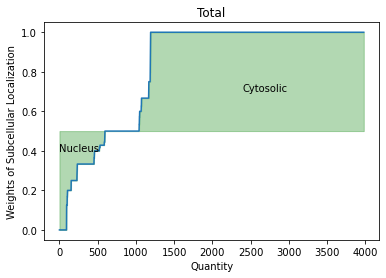

In [194]:
import matplotlib.pyplot as plt

w = data.sort_values(by=["Cytosolic"])["Cytosolic"]
w_idx = np.arange(len(w))

plt.plot(w_idx, w)
# plt.plot(w, w_idx)
plt.fill_between(w_idx, w, 0.5, color = 'g', alpha=0.3)
# plt.fill_between(w_idx, w, 0.5, color = 'r', alpha=0.3)
plt.text(len(w) * 0.6, .7, "Cytosolic")
plt.text(0, .4, "Nucleus")
plt.title("Total")
plt.xlabel("Quantity")
plt.ylabel("Weights of Subcellular Localization")
plt.show()

In [195]:
print(data["Cytosolic"].value_counts())
print(data["Nucleus"].value_counts())

# w = data[data["SubCellular_Localization"] == "Cytosolic"].sort_values(by=["W"])["W"]
# index = np.arange(len(w))
# plt.plot(index, w)
# plt.xlabel("Quantity")
# plt.ylabel("Weights of Subcellular Localization")
# plt.show()

1.000000    2790
0.500000     448
0.333333     219
0.666667      95
0.000000      93
0.250000      76
0.400000      65
0.428571      56
0.200000      48
0.600000      21
0.750000      18
0.416667       8
0.125000       8
0.444444       6
0.363636       4
0.625000       3
0.166667       3
0.533333       3
0.571429       3
0.800000       2
0.285714       2
0.714286       2
0.181818       1
0.888889       1
0.461538       1
0.307692       1
0.476190       1
0.375000       1
0.300000       1
Name: Cytosolic, dtype: int64
0.000000    2790
0.500000     448
0.666667     219
0.333333      95
1.000000      93
0.750000      76
0.600000      65
0.571429      56
0.800000      48
0.400000      21
0.250000      18
0.583333       8
0.875000       8
0.555556       6
0.636364       4
0.833333       3
0.466667       3
0.428571       3
0.375000       3
0.285714       2
0.200000       2
0.714286       2
0.523810       1
0.692308       1
0.625000       1
0.538462       1
0.700000       1
0.818182       1
0

In [152]:
print("ALL")
print(data["SubCellular_Localization"].value_counts())

for i in range(5, 10):
    print(i/10)
    print(data[data["W"] > i/10]["SubCellular_Localization"].value_counts())

ALL
Cytosolic    3887
Nucleus      1190
Name: SubCellular_Localization, dtype: int64
0.5
Cytosolic    2938
Nucleus       594
Name: SubCellular_Localization, dtype: int64
0.6
Cytosolic    2911
Nucleus       457
Name: SubCellular_Localization, dtype: int64
0.7
Cytosolic    2813
Nucleus       231
Name: SubCellular_Localization, dtype: int64
0.8
Cytosolic    2791
Nucleus       105
Name: SubCellular_Localization, dtype: int64
0.9
Cytosolic    2790
Nucleus        93
Name: SubCellular_Localization, dtype: int64


In [158]:
data.to_csv("data/society/cdhit80_data.csv", index=False)

In [13]:
data_df = pd.read_csv("data/society/cdhit80_data.csv")


# df = seq_sub_df["Refseq_ID"].value_counts().reset_index()

# print(seq_sub_df.drop_duplicates()["Sequence"].value_counts())

# print(seq_sub_df[seq_sub_df["Refseq_ID"].isin(df[df["Refseq_ID"] > 1]["index"][0:1])])
# print(len(seq_df[seq_df["Refseq_ID"].isin(df[df["Refseq_ID"] > 1]["index"])]))
# print(len(seq_df['Refseq_ID']))
# print(len(seq_df['Refseq_ID'].unique()))
cdhit_df = cdhit80_df.rename(columns={0:"Gene_ID", 1:"Refseq_ID", 2:"Sequence"})
print(len(cdhit_df))
merge_df = pd.merge(data_df, cdhit_df, on=["Refseq_ID"], how="inner")
print(merge_df.head(1))
print(len(merge_df))
# print(len(data_df['Refseq_ID']))
# print(len(data_df['Refseq_ID'].unique()))
merge_df.to_csv("data/society/cdhit80_data_seq.csv")


3980
     Refseq_ID  Cytosolic  Nucleus     Gene_ID  \
0  NR_002728.3        0.3      0.7  NCBI:10984   

                                            Sequence  
0  AGGCAGAACGGTCGCCGCGTCGCCTCAGCACGGACCTCCAGGGAGC...  
3980


In [3]:
df = pd.read_csv("data/linear_features/old/cdhit80_k1_linear10_norL.csv")

In [17]:
df = pd.read_csv("data/society/cdhit80_data_seq.csv")

In [18]:
df.head(1)

,Unnamed: 0,Refseq_ID,Cytosolic,Nucleus,Gene_ID,Sequence
0,0,NR_002728.3,0.3,0.7,NCBI:10984,AGGCAGAACGGTCGCCGCGTCGCCTCAGCACGGACCTCCAGGGAGC...


In [4]:
len(df)

3980

In [5]:
cyt = df[df["Cytosolic"] >= 0.75]
cyt["loc"] = "Cytosolic"
nuc = df[df["Nucleus"] >= 0.75]
nuc["loc"] = "Nucleus"
print(len(cyt))
print(len(nuc))
output = cyt.append(nuc)
output = output.drop(columns=["Cytosolic", "Nucleus"])
print(len(output))
print(output.head(1))


2811
229
3040
         0          1          2          3          4          5          6  \
8 -7.58671  12.403196  26.422672 -88.104345  96.099966 -51.728765  14.502938   

          7         8         9  ...          36        37        38  \
8 -2.431709  0.403059  0.041272  ... -103.913918  26.12355  6.326008   

         39       40      41        42        43    len        loc  
8 -4.428124  0.74653 -0.1738 -0.039532  0.140704  16050  Cytosolic  

[1 rows x 46 columns]


<ipython-input-5-eebaa4a36bcc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cyt["loc"] = "Cytosolic"
<ipython-input-5-eebaa4a36bcc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuc["loc"] = "Nucleus"


In [2]:
output.to_csv("data/linear_features/old/cdhit80_k1_linear10_norL_loc75.csv", index=False)

Nuc
